<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Logistic_regression_Students_Pass_Fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://heartbeat.comet.ml/logistic-regression-in-python-using-scikit-learn-d34e882eebb1



In [27]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/dhirajk100/LogReg01/master/Student-Pass-Fail-Data.csv")
df

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0
...,...,...,...
995,6,22,1
996,9,30,1
997,3,39,0
998,7,25,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9c2a436d0>,
      dtype=object)

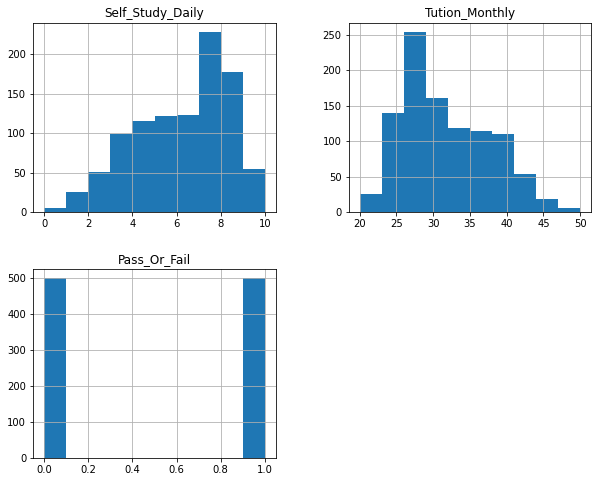

In [29]:
df.hist()

In [30]:
df['Pass_Or_Fail'].value_counts()

0    501
1    499
Name: Pass_Or_Fail, dtype: int64

In [31]:
x = df.drop('Pass_Or_Fail',axis = 1)
y = df.Pass_Or_Fail

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [33]:
logistic_regression = LogisticRegression(solver='newton-cg', random_state=42)

In [34]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='newton-cg')

In [35]:
y_pred = logistic_regression.predict(x_test)

In [11]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

97.0

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, logistic_regression.predict(x_test)))
print(classification_report(y_test, logistic_regression.predict(x_test)))

[[95  6]
 [ 0 99]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       101
           1       0.94      1.00      0.97        99

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [13]:
# print(model.classes_)

In [14]:
# predicting whether a student will fail or pass
First_Friend = logistic_regression.predict((np.array([4, 38]).reshape(1, -1)))
First_Friend # Failed

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [15]:
Second_Friend = logistic_regression.predict((np.array([1, 10]).reshape(1, -1)))
Second_Friend

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

### It is said that logistic regression requires relatively larger number of data points to be useful - find the smallest amount of data that would make the models still be useful (how would you define that)?


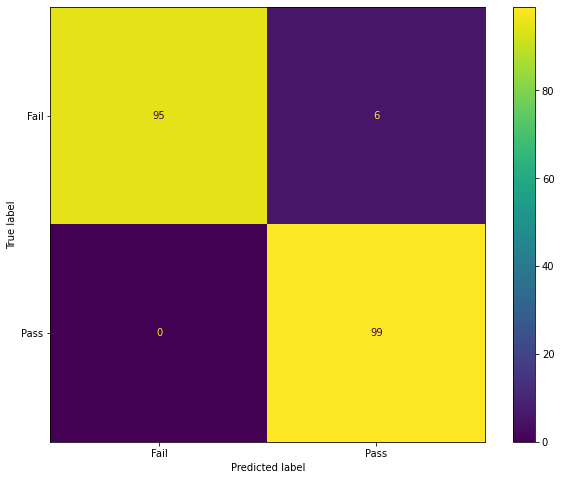

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(y_test, logistic_regression.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])

disp.plot()
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

def train_model(x, y, solver):
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
  logistic_regression = LogisticRegression(solver=solver, random_state=42)
  logistic_regression.fit(x_train, y_train)
  y_pred = logistic_regression.predict(x_test)
  return y_test, y_pred

df = pd.read_csv('https://raw.githubusercontent.com/dhirajk100/LogReg01/master/Student-Pass-Fail-Data.csv')
target_name = 'Pass_Or_Fail'
solver = 'liblinear'

x_all, y_all = df.drop(target_name, axis=1), df[target_name]
y_test, y_pred = train_model(x_all, y_all, solver)

accuracies = {'All': accuracy_score(y_test, y_pred)}
for c in df.columns.difference([target_name]):
  x, y = df[c], df[target_name]
  y_test, y_pred = train_model(np.array(x).reshape(-1, 1), y, solver)
  accuracies[c] = accuracy_score(y_test, y_pred)

print(accuracies)

{'All': 0.968, 'Self_Study_Daily': 0.888, 'Tution_Monthly': 0.916}


### Exercise - random guesser.
We have mentioned, that for binary classification a random number generator guessing the classes would be around 50% right.
When class count is n the random guesser should be 100 / n-% accurate.
Prove that this is correct or incorrect.
Use either your own generated data or function: make_classification().
Then check if the same holdS for a dataset with 50/50 distribution (student pass/fail dataset).
Print the confusion matrix - is these anything interesting in it. What should be the distribution 25% in each section?


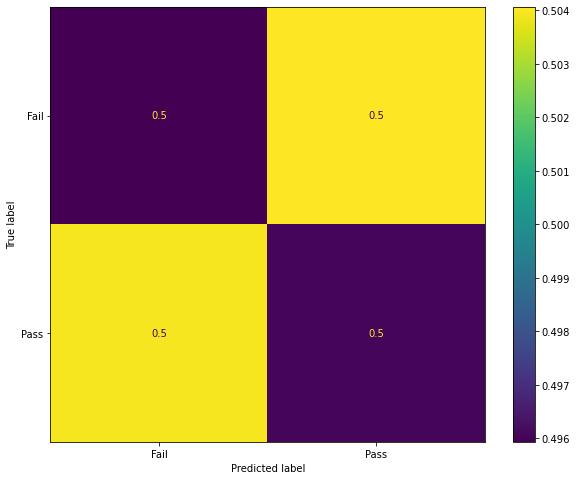

In [37]:
import numpy as np

# passes = df.nlargest(499, 'Pass_Or_Fail')
# fails = df.nsmallest(499, 'Pass_Or_Fail')
# equal_y = np.concatenate((passes, fails))
mydf = df.drop(df.index[[1,4]])
y = mydf['Pass_Or_Fail']
random_array = np.random.randint(2, size=998).reshape(-1, 1)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(random_array, y)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])

disp.plot()
plt.show()

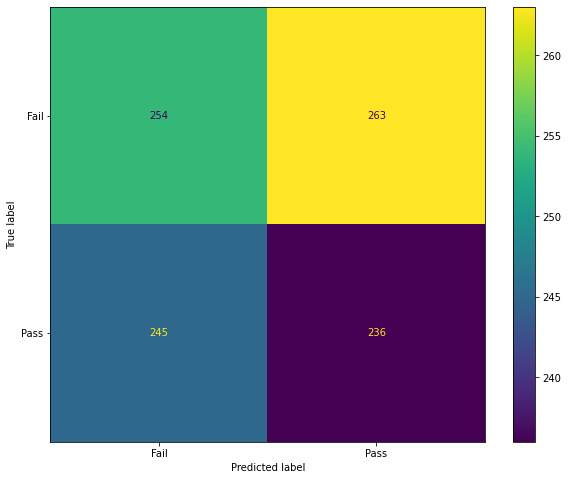

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/dhirajk100/LogReg01/master/Student-Pass-Fail-Data.csv")

mydf = df.drop(df.index[[1,4]])
y = mydf['Pass_Or_Fail']
random_array = np.random.randint(2, size=998).reshape(-1, 1)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(random_array, y)
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])

disp.plot()
plt.show()

In [41]:

print(f'ACC: {accuracy_score(y, random_array)}')

ACC: 0.4909819639278557


### Make_clasification

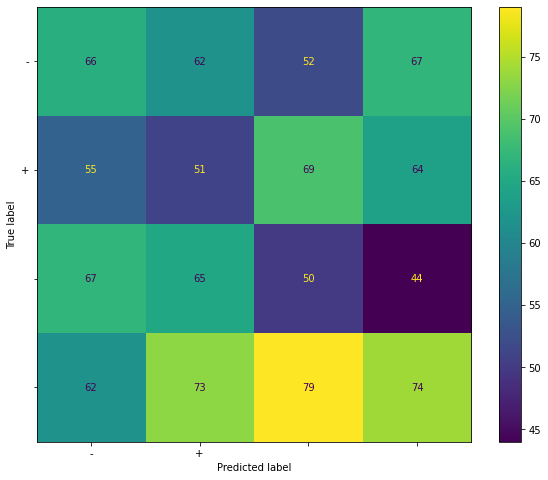

In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

n_samples = 1000
n_classes = 4

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=4)
random_array = np.random.randint(n_classes, size=n_samples).reshape(-1, 1)

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(random_array, Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])

disp.plot()
plt.show()

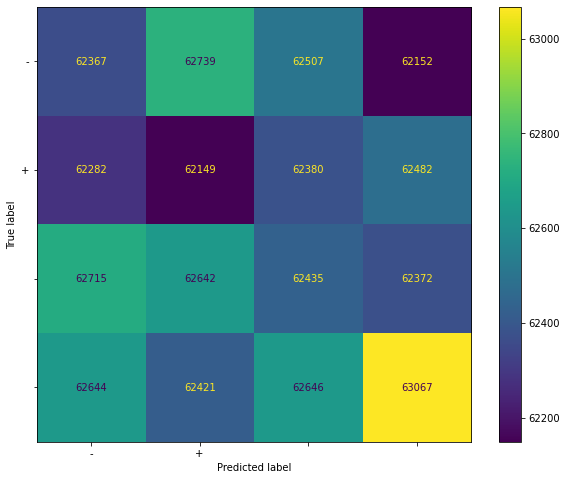

ACC: 0.250018


In [43]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

n_samples = 1000000
n_classes = 4

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=4)
random_array = np.random.randint(n_classes, size=n_samples).reshape(-1, 1)

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(random_array, Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])

disp.plot()
plt.show()

print(f'ACC: {accuracy_score(Y, random_array)}')

### Multi-class clasification

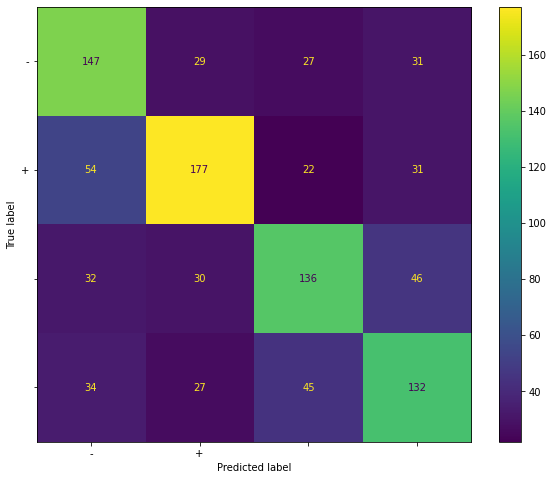

ACC: 0.592


In [55]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

n_samples = 10000
n_classes = 4

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=18)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
log_reg = LogisticRegression(solver='lbfgs', random_state=42, multi_class='ovr')
log_reg.fit(x_train, y_train)

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(log_reg.predict(x_test), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])

disp.plot()
plt.show()

print(f'ACC: {accuracy_score(y_test, log_reg.predict(x_test))}')

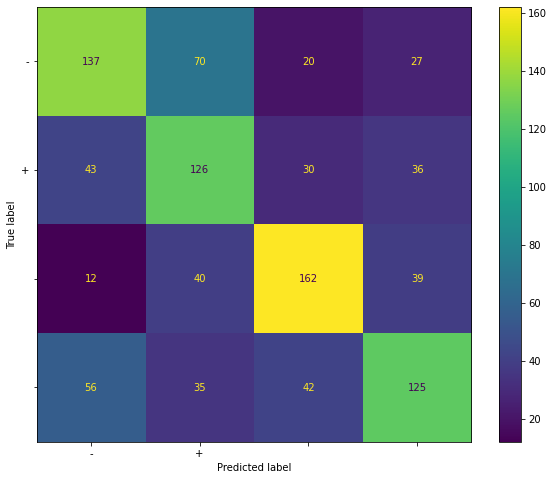

ACC: 0.55


In [64]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

n_samples = 10000
n_classes = 4

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=18)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
log_reg = LogisticRegression(solver='lbfgs', random_state=42, multi_class='multinomial')
log_reg.fit(x_train, y_train)


plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(log_reg.predict(x_test), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])

disp.plot()
plt.show()

print(f'ACC: {accuracy_score(y_test, log_reg.predict(x_test))}')